# 네이버 쇼핑 TV 가격 예측 모델 학습

- 문제) 화면크기, 형태, 해상도, 화면비율, LCD, LED, OLED, QLED, 단자, 부가기능 이 각각 55, 0, 2160, 1, 0, 1, 0, 0, 3, 1 인 네이버 쇼핑 TV 가격을 예측하세요.

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='test')

train_df

,ID,판매가,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
0,8,396240,55,0,2160,1,0,1,0,0,3,1
1,9,412870,55,0,2160,1,0,1,0,0,3,1
2,10,414590,55,0,2160,1,0,1,0,0,3,1
3,14,418000,55,0,2160,1,0,1,0,0,3,1
4,15,419000,55,0,2160,1,0,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,20670,1271670,49,0,1080,1,0,1,0,0,2,6
6996,20672,1441670,49,0,1080,1,0,1,0,0,2,6
6997,20673,1441680,49,0,1080,1,0,1,0,0,2,6
6998,20675,1571400,49,0,1080,1,0,1,0,0,2,6


In [4]:
# 반드시 확인할것!
train_df.isna().sum()

ID      0
판매가     0
화면크기    0
형태      0
해상도     0
화면비율    0
LCD     0
LED     0
OLED    0
QLED    0
단자      0
부가기능    0
dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      7000 non-null   int64
 1   판매가     7000 non-null   int64
 2   화면크기    7000 non-null   int64
 3   형태      7000 non-null   int64
 4   해상도     7000 non-null   int64
 5   화면비율    7000 non-null   int64
 6   LCD     7000 non-null   int64
 7   LED     7000 non-null   int64
 8   OLED    7000 non-null   int64
 9   QLED    7000 non-null   int64
 10  단자      7000 non-null   int64
 11  부가기능    7000 non-null   int64
dtypes: int64(12)
memory usage: 656.4 KB


In [6]:
train_df.describe()

,ID,판매가,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,10310.438857,1.686936e+06,53.471000,0.086714,1799.794286,0.523857,0.002571,0.820714,0.031286,0.093429,2.835143,3.120857
std,6000.106692,1.751524e+06,12.147814,0.281436,559.870133,0.499466,0.050648,0.383619,0.174101,0.291053,1.094072,2.040375
min,8.000000,1.700000e+04,15.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5102.750000,6.086625e+05,43.000000,0.000000,1080.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,10211.000000,1.159185e+06,55.000000,0.000000,2160.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,15517.000000,2.147532e+06,65.000000,0.000000,2160.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,5.000000
max,20676.000000,2.940000e+07,80.000000,1.000000,2160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,8.000000


In [9]:
# LCD, LED, OLED, QLED는 일종의 더미변수
len(train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)])

# (test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)

364

In [10]:
search_df = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
# search_df 제외한 나머지
train_df = train_df.drop(search_df.index, axis=0)
search_df = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
test_df = test_df.drop(search_df.index, axis=0)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6636 non-null   int64
 1   판매가     6636 non-null   int64
 2   화면크기    6636 non-null   int64
 3   형태      6636 non-null   int64
 4   해상도     6636 non-null   int64
 5   화면비율    6636 non-null   int64
 6   LCD     6636 non-null   int64
 7   LED     6636 non-null   int64
 8   OLED    6636 non-null   int64
 9   QLED    6636 non-null   int64
 10  단자      6636 non-null   int64
 11  부가기능    6636 non-null   int64
dtypes: int64(12)
memory usage: 674.0 KB


In [28]:
train_df.corr()

,ID,판매가,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
ID,1.000000,0.209871,0.059389,0.114880,-0.029099,0.120977,0.025500,-0.111327,0.122795,0.049296,0.002121,0.244514
판매가,0.209871,1.000000,0.634457,0.052178,0.370425,-0.150205,-0.008157,-0.487213,0.239198,0.415364,-0.214304,0.371879
화면크기,0.059389,0.634457,1.000000,0.111088,0.686708,-0.078878,0.007966,-0.263554,0.094148,0.243651,-0.156203,0.387837
형태,0.114880,0.052178,0.111088,1.000000,0.135387,-0.045618,-0.016548,-0.023764,-0.032282,0.049418,-0.067695,0.139098
해상도,-0.029099,0.370425,0.686708,0.135387,1.000000,-0.112418,-0.064289,-0.228817,0.087024,0.220796,-0.276793,0.347716
화면비율,0.120977,-0.150205,-0.078878,-0.045618,-0.112418,1.000000,-0.054632,0.184225,-0.024628,-0.186433,0.298510,0.309073
LCD,0.025500,-0.008157,0.007966,-0.016548,-0.064289,-0.054632,1.000000,-0.132428,-0.009634,-0.017244,0.053150,-0.079624
LED,-0.111327,-0.487213,-0.263554,-0.023764,-0.228817,0.184225,-0.132428,1.000000,-0.469097,-0.839599,0.277607,-0.152042
OLED,0.122795,0.239198,0.094148,-0.032282,0.087024,-0.024628,-0.009634,-0.469097,1.000000,-0.061083,-0.103933,0.072242
QLED,0.049296,0.415364,0.243651,0.049418,0.220796,-0.186433,-0.017244,-0.839599,-0.061083,1.000000,-0.264525,0.144511


In [29]:
train_df[train_df['해상도']<1000]
# 전처리 수행
# y값 판매가와의 각 x변수들기리의 연관도
# . 이상치 확인해서 제거
# 다중공선성도 확인해야함. VIF (x값들끼리의 연관도가 높으면 그중 하나의 변수는 제거)
# 

,ID,판매가,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
39,102,274770,32,0,720,0,0,1,0,0,2,0
40,104,275770,32,0,720,0,0,1,0,0,2,0
41,106,282860,32,0,720,0,0,1,0,0,2,0
42,112,289000,32,0,720,0,0,1,0,0,2,0
43,115,291920,32,0,720,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6900,20390,217280,24,0,720,1,0,1,0,0,4,2
6901,20395,229000,24,0,720,1,0,1,0,0,4,2
6902,20397,246820,24,0,720,1,0,1,0,0,4,2
6975,20626,626740,32,0,720,1,0,1,0,0,5,2


In [12]:
x_train = train_df.drop(['ID', '판매가'], axis=1)       # ID는 x변수에 해당되지 않음. 판매가는 Y값으로 할것임
x_test = test_df.drop(['ID', '판매가'], axis=1)
y_train = train_df['판매가']
y_test = test_df['판매가']

In [17]:
print(x_train.shape, y_train.shape)     # (6636, 10) (6636,) x값과 y값의 행갯수가 반드시 일치해야함!!!
print(x_test.shape, y_test.shape)       # train값과 test값의 열갯수가 반드시 일치해야함!!!!

# x의 shapes (6636, 10)는 모델식에 입력되는 10개의 x변수가 있음.
# 딥러닝에서는 입력x의 갯수를 사용자가 직접 설정해야하는데 컴퓨터가 계산하는 shape과 다르면 에러발생!
x_train.shape[1]

(6636, 10) (6636,)
(2816, 10) (2816,)


10

In [13]:
x_train

,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
0,55,0,2160,1,0,1,0,0,3,1
1,55,0,2160,1,0,1,0,0,3,1
2,55,0,2160,1,0,1,0,0,3,1
3,55,0,2160,1,0,1,0,0,3,1
4,55,0,2160,1,0,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
6995,49,0,1080,1,0,1,0,0,2,6
6996,49,0,1080,1,0,1,0,0,2,6
6997,49,0,1080,1,0,1,0,0,2,6
6998,49,0,1080,1,0,1,0,0,2,6


In [14]:
y_train

0        396240
1        412870
2        414590
3        418000
4        419000
         ...   
6995    1271670
6996    1441670
6997    1441680
6998    1571400
6999    2894380
Name: 판매가, Length: 6636, dtype: int64

In [18]:
type(x_train)

pandas.core.frame.DataFrame

In [19]:
# 머신러닝 딥러닝에서는 array마나 처리함.
x_train = x_train.to_numpy()        # x_train.values와 같음
x_test = x_test.to_numpy()        # x.test.values와 같음

## 모델 피팅, 실행
 - [과대적합] 트레이닝 자료에서는 r2스코어가 좋은데 테스트 자료에서는 나쁘게 나올경우가 있음
 - [과소적합] 트레이닝, 테스트 모두 스코어가 좋지 않을 경우가 있음

In [32]:
# 선형회귀식에서 사용된 변수들의 검증(OLS), pvalue등을 확인해야함

In [30]:
# 선형회귀 
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()      # 모델학습
model_lr.fit(x_train, y_train)     # 모델 검증
print(model.score(x_test, y_test))


0.5366039678040928


### 선형회귀 k겹교차검증(k-fold)
### 데이터 갯수가 작을때 트레이닝하고 테스트하고 경우의 수를 다르게함

### https://wikidocs.net/84810

### 라쏘와 리지모델에서 alpha값은 규제정도를 나타냄. alpha값을 높이면 규제를 강하게 함.

### 라쏘 모델
 - 여러개의 x변수중에 영향력이 작은(회귀계수값이작은)변수는 취급하지 않겠다.

In [31]:
from sklearn.linear_model import Lasso

alphaList=[1.0, 0.1, 100]

for alphaValue in alphaList:
    model_lasso = Lasso(alpha=alphaValue)      # 모델학습
    model_lasso.fit(x_train, y_train)     # 모델 검증
    print(model.score(x_train, y_train),model.score(x_test, y_test))

0.5676135662093205 0.5366039678040928
0.5676135662093205 0.5366039678040928
0.5676135662093205 0.5366039678040928


C:\Users\baekj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11166778068930.0, tolerance: 1945429560415.7078
  model = cd_fast.enet_coordinate_descent(
C:\Users\baekj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11148959678351.0, tolerance: 1945429560415.7078
  model = cd_fast.enet_coordinate_descent(


### 리지모델
 - 여러개ㅐ의 x변수중에 영향력이 너무 큰(회기계수가 큰 값) 값의 영향력을 감소 시킴.

In [23]:
from sklearn.linear_model import Ridge

alphaList=[1.0, 0.1, 100]

for alphaValue in alphaList:
    model_ridge = Ridge(alpha=alphaValue)      # 모델학습
    model_ridge.fit(x_train, y_train)     # 모델 검증
    print(model.score(x_test, y_test))

0.5366039678040928
0.5366039678040928
0.5366039678040928


## 머신러닝, 딥러닝은 y값에 따라 예측, 분류를 실행함
 - 예측: y레이블(종속변수)의 결과가 한가지의 무한대의 숫자값
 - 분류(이항, 다항분류): y레이블의 범주형 덷이터인 경우 사용됨
    - 이항분류: y레이블(종속변수)의 결과가 두가지의 분류 결과만 나옴
    - 다항분류: y레이블(종속변수)의 결과가 세가지 이상의 분류가 나옴

 - 사이킷런 ML에서 참고: 로지스틱(로짓)회귀분석에서 결과값이 0또는 1로 나오게 하면 \
                        로지스틱(로짓)회귀분석에서 결과값이 0~1사이로 나오게 하면 회귀임
 - 오즈비(예: 게임에서 오즈비가 1/4로 표기되면 해석, 총5번 게임해서 1번 이겼음)\
   오즈비가 1이면 4/4, 4승4패 50%, 귀무가설채택

# 이항분류함수
 - 이항분류에서는 실제값하고 예측값하고의 일치율을 계산함.
  - 4가지 경우를 계산
  - y값이1, y예측값이1
  - y값이1, y예측값이0
  - y값이0, y예측값이1
  - y값이0, y예측값이0

In [35]:
x = [12, 3, 4, 3]
y = ['생존','생존','사망','생존']       # y값을 숫자로 변환해야함.

# 레벨인코딩 함수로 작업해도 됨, 단 레벨인코딩은 ㄱ, ㄴ, 순서대로 0, 1,...가 부여됨
y_label=[]
for i in y:
    if i=='생존':
        y_label.append(1)
    else:
        y_label.append(0)
print(y_label)

x=np.array(x)

# x값을 넣었을때 수식계산의 결과가 0과1사이에 나올수 있도록 하는 여러가지 함수에서 골라서 사용함

y_hat=1/(1+np.exp(-x))      # w,b 값을 계산하고, 0~1사이값이 나올수 있는 계산식이어야함
# 만약에 y_hat이 최종값이면 이 값을 0과 1로 제작해야만 실제 y값하고 비교가 가능

y_hat_result=[]

for i in y_hat:
    if i>0.5:       # 0.5를 임계구역이라고함. 임계구역은 사용자가 정함.
        y_hat_result.append(1)
    else:
        y_hat_result.append(0)

y_hat_result

[1, 1, 0, 1]


[1, 1, 1, 1]

In [36]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x=[12,3,4,3]
sigmoid(np.array(x))

array([0.99999386, 0.95257413, 0.98201379, 0.95257413])

In [39]:
# https://wikidocs.net/41256
# ckarh argmax
# 자료중 가장 큰 값이 있는 위치값 리턴
# 예를들어서 y_hat이 선호색상에 대한 거라면

a=[0.00003, 0.000007, 0.00002, 0.99999, 0.00002]
y_hat_label=['빨강', '파랑', '초록', '검정', '흰색']
y_hat_label[np.argmax(a)]

'검정'

## 로지스틱회귀분석

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

##########데이터 분석

##########데이터 전처리

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

##########모델 생성

model = LogisticRegression(penalty='none')

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증
y_predict = model.predict(x_test)

print('---테스트-예측값--- ')
print(y_predict)

print('\n--테스트-실제값--- ')
print(y_test)

print('\n--테스트데이터-정확도--- ')
print(accuracy_score(y_test))

---테스트-예측값--- 
[1 0 1 0]

--테스트-실제값--- 
[1 0 1 0]

--테스트데이터-정확도--- 


NameError: name 'accuracy_score' is not defined

In [ ]:
y_predict = model.predict_proba(x_test)
print(y_predict)

## [이항분류의 평가분류지표] 혼합행렬, 혼돈행렬
 - 혼합행렬은 다항분류도 가능함

[[2 0]
 [0 2]]


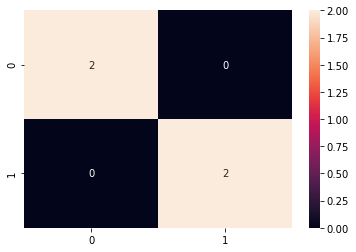

In [53]:
# https://wikidocs.net/45729
# 혼합행렬
from sklearn.metrics import confusion_matrix
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()

In [52]:
# 데이터분석과 관련한 필기시험에 출제됨!

# 재현율
recall_score = (cm[1][1]) / (cm[1][0]+cm[1][1])
print(recall_score)

# 정확도
accuracy_score = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print(accuracy_score)

# 정밀도
precision_score = (cm[1][1]) / (cm[0][1] + cm[1][1])
print(precision_score)

f1_score = ((precision_score * recall_score) / (precision_score + recall_score)) * 2
print(f1_score)

1.0
1.0
1.0
1.0


In [55]:
# https://https://wikidocs.net/87235
# 분류분석 보고서

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [59]:
# https://https://wikidocs.net/87222
# 값의 연관성 확인
# summary에서 보이는 Pvalue값이 0.05보다 크면 x값에서 제거함.

import statsmodels.api as sm
logit_mod = sm.Logit(y_train, x_train)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.449141
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.3211
Time:                        15:16:03   Log-Likelihood:                -3.5931
converged:                       True   LL-Null:                       -5.2925
Covariance Type:            nonrobust   LLR p-value:                   0.06525
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4699      0.452      1.040      0.298      -0.415       1.355
x2            -0.1790      0.314     -0.570      0.569      -0.795       0.437
==============================================================================
"""

## ROC 커브곡선
 - 이항분류에서 일치율을 시각화
 - 이때 ROC하단면적을 AUC라고 함.
 - AUC가 클수록 좋은 결과임.